In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import drive
import os


drive.mount('/content/drive')

kaggle_json_path = '/content/drive/MyDrive/kaggle.json'

os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

!cp '{kaggle_json_path}' ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.4 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!kaggle datasets download -d gpiosenka/cards-image-datasetclassification

import zipfile
import shutil

with zipfile.ZipFile("/content/cards-image-datasetclassification.zip","r") as zip_ref:
    zip_ref.extractall("cards-image-dataset")

shutil.rmtree('/content/cards-image-dataset/train/joker', ignore_errors=True)
shutil.rmtree('/content/cards-image-dataset/valid/joker', ignore_errors=True)
shutil.rmtree('/content/cards-image-dataset/test/joker', ignore_errors=True)


Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
License(s): CC0-1.0
 99% 383M/385M [00:15<00:00, 32.0MB/s]
100% 385M/385M [00:15<00:00, 25.8MB/s]


In [13]:
dataset_basepath = './cards-image-dataset/'

dataset_info = {"train_total": 0, "valid_total": 0, "test_total": 0, "train": [], "valid": [], "test": []}

for i, _set in enumerate(['train', 'valid', 'test']):
  set_path = dataset_basepath + _set
  train_dir = os.listdir(set_path)
  print('Number of directories in {_set}: ', len(train_dir))

  dir_images_count = 0
  for dirname in train_dir:
    images_count = len(os.listdir(set_path + '/' + dirname))
    dir_images_count += images_count
    dataset_info[_set].append({"label": dirname, "qtd": images_count})

  dataset_info[_set + "_total"] = dir_images_count

df_train = pd.DataFrame(dataset_info['train'])
df_valid = pd.DataFrame(dataset_info['valid'])
df_test = pd.DataFrame(dataset_info['test'])

df_train['set'] = 'train'
df_valid['set'] = 'valid'
df_test['set'] = 'test'
df = pd.concat([df_train, df_valid, df_test])
df_summary = df.groupby(['label', 'set']).agg({'qtd': 'sum'}).reset_index()

Number of directories in {_set}:  52
Number of directories in {_set}:  52
Number of directories in {_set}:  52
{'train_total': 7509, 'valid_total': 260, 'test_total': 260, 'train': [{'label': 'queen of clubs', 'qtd': 161}, {'label': 'ten of diamonds', 'qtd': 151}, {'label': 'four of hearts', 'qtd': 154}, {'label': 'two of spades', 'qtd': 155}, {'label': 'two of clubs', 'qtd': 130}, {'label': 'nine of spades', 'qtd': 154}, {'label': 'jack of hearts', 'qtd': 168}, {'label': 'two of hearts', 'qtd': 155}, {'label': 'nine of hearts', 'qtd': 133}, {'label': 'seven of clubs', 'qtd': 108}, {'label': 'eight of clubs', 'qtd': 138}, {'label': 'five of hearts', 'qtd': 136}, {'label': 'four of spades', 'qtd': 140}, {'label': 'six of hearts', 'qtd': 127}, {'label': 'three of clubs', 'qtd': 126}, {'label': 'ace of diamonds', 'qtd': 129}, {'label': 'jack of spades', 'qtd': 172}, {'label': 'six of diamonds', 'qtd': 139}, {'label': 'three of spades', 'qtd': 142}, {'label': 'eight of hearts', 'qtd': 152}

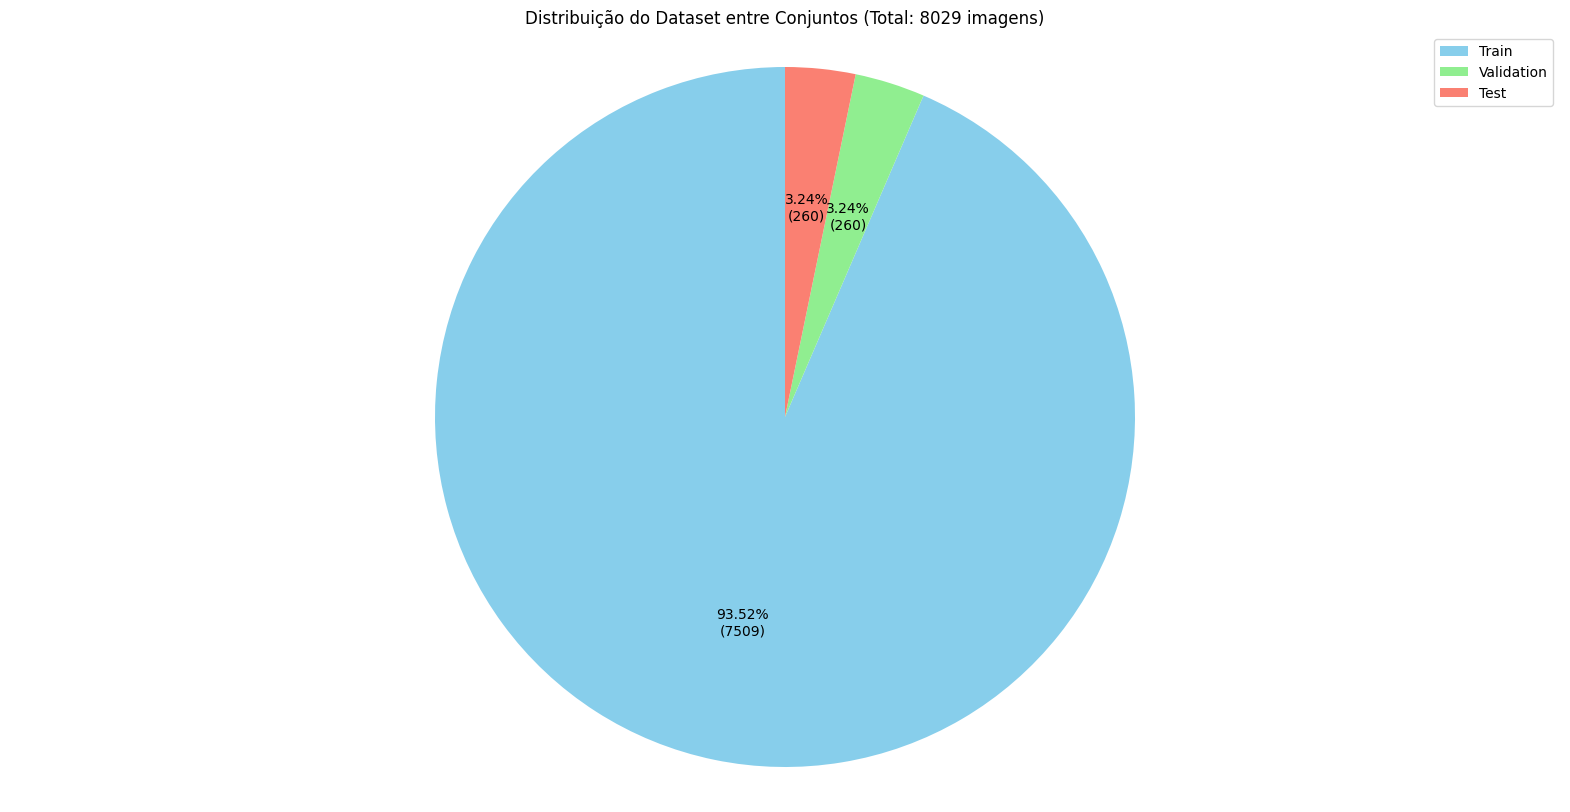

In [14]:
dataset_sizes = [dataset_info['train_total'], dataset_info['valid_total'], dataset_info['test_total']]
labels = ['Train', 'Validation', 'Test']
total_images = sum(dataset_sizes)

def autopct_format(pct):
    absolute = int(np.round(pct / 100. * total_images))
    return f'{pct:.2f}%\n({absolute})'

plt.figure(figsize=(20, 10))
plt.pie(dataset_sizes,
        labels=labels,
        autopct=autopct_format,
        startangle=90,
        colors=['skyblue', 'lightgreen', 'salmon'],
        labeldistance=None)
plt.legend(loc='best')
plt.axis('equal')
plt.title(f'Distribuição do Dataset entre Conjuntos (Total: {total_images} imagens)')
plt.show()


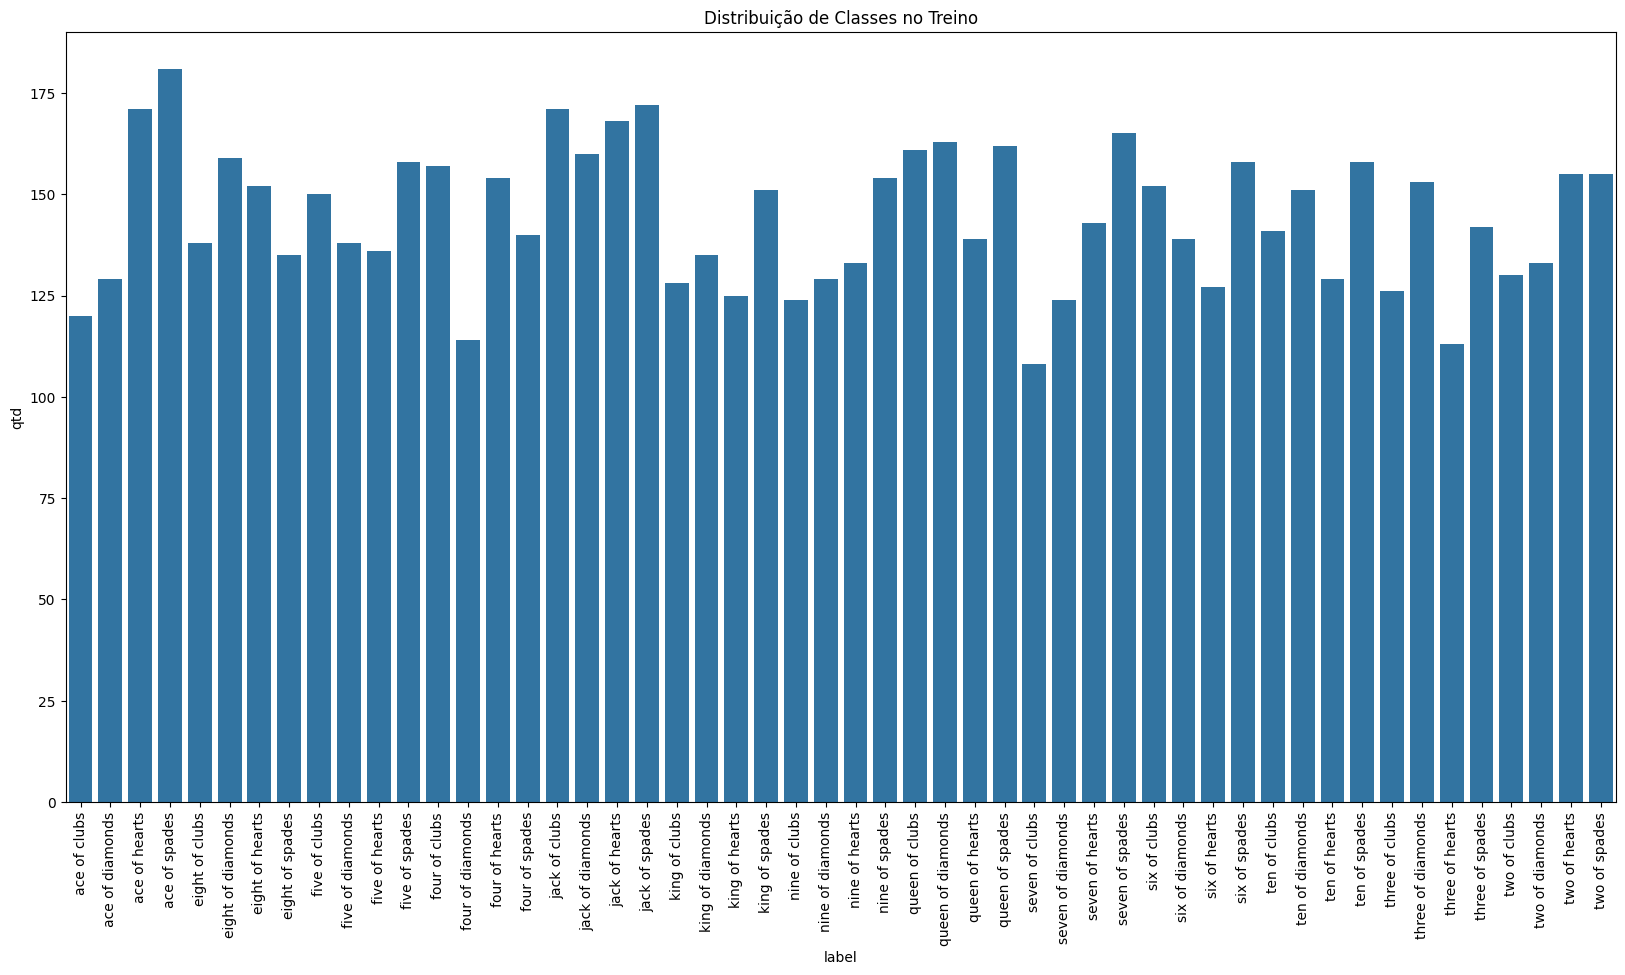

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_summary[df_summary['set'] == 'train'], x='label', y='qtd')
plt.title('Distribuição de Classes no Treino')
plt.xticks(rotation=90)
plt.show()

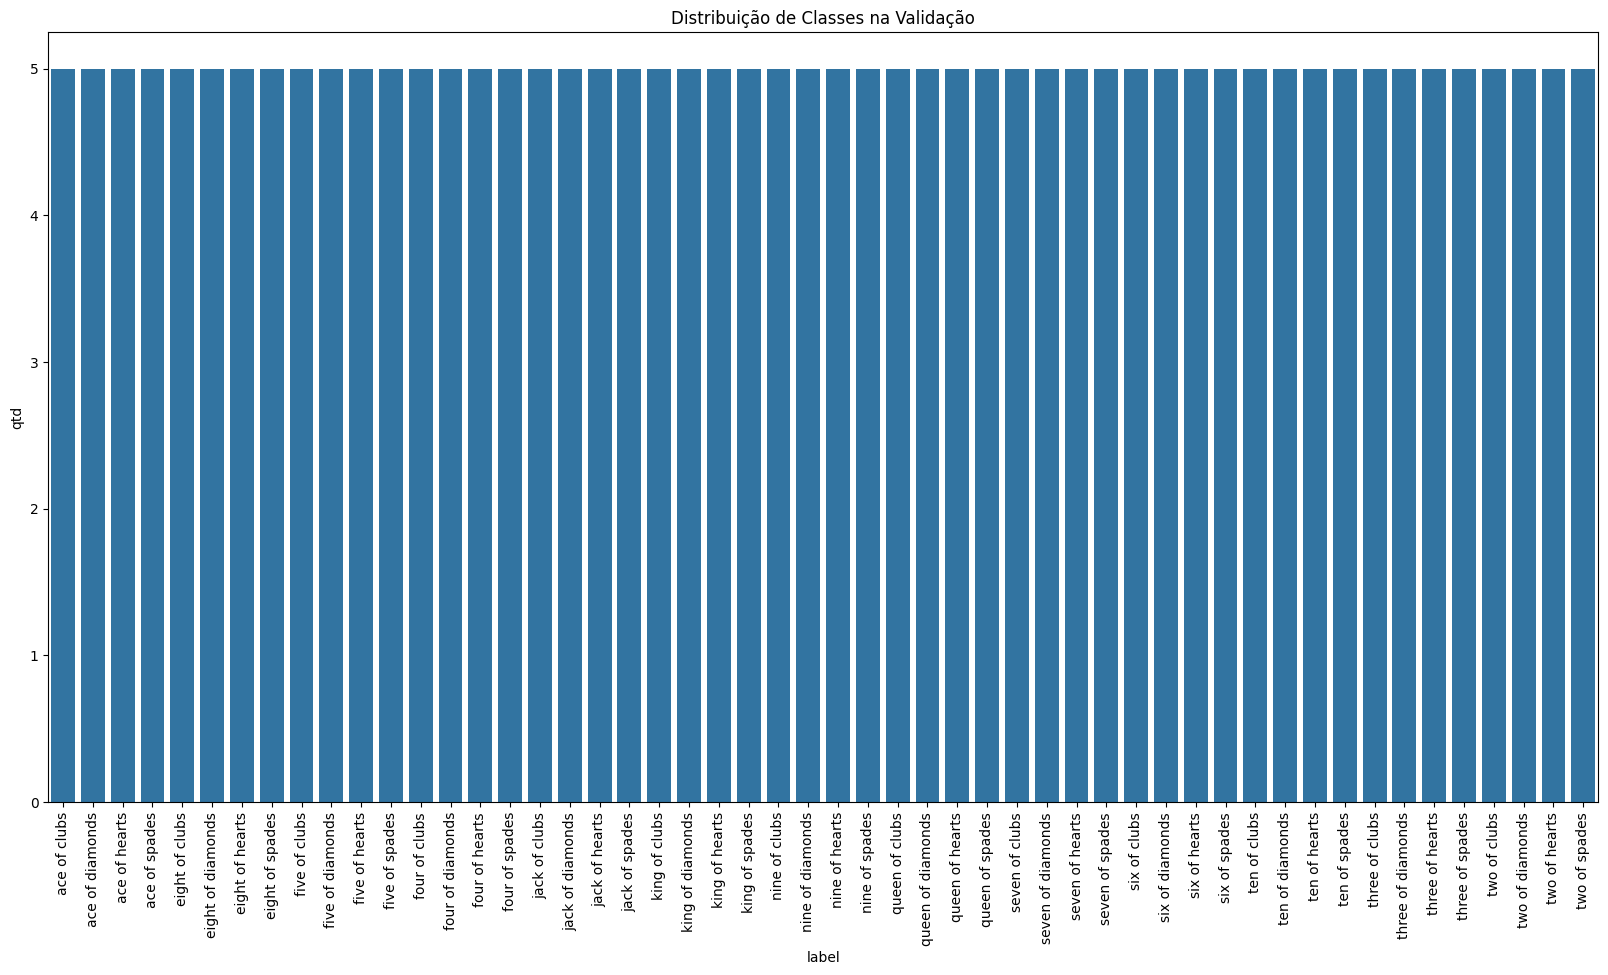

In [16]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_summary[df_summary['set'] == 'valid'], x='label', y='qtd')
plt.title('Distribuição de Classes na Validação')
plt.xticks(rotation=90)
plt.show()


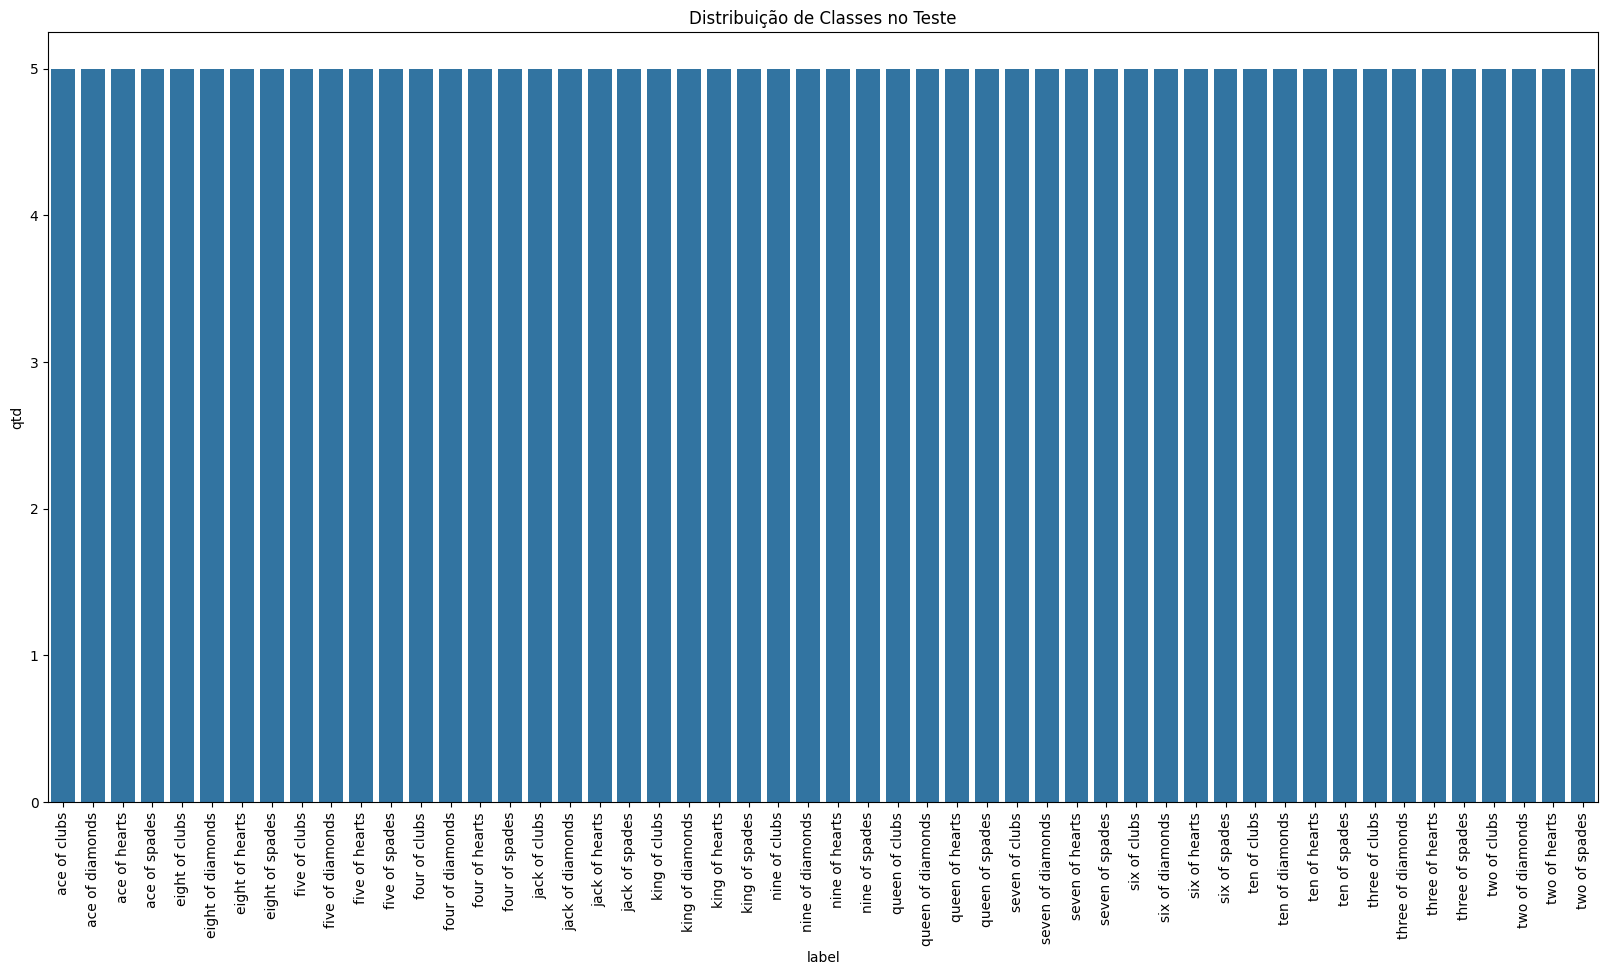

In [17]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df_summary[df_summary['set'] == 'test'], x='label', y='qtd')
plt.title('Distribuição de Classes no Teste')
plt.xticks(rotation=90)
plt.show()


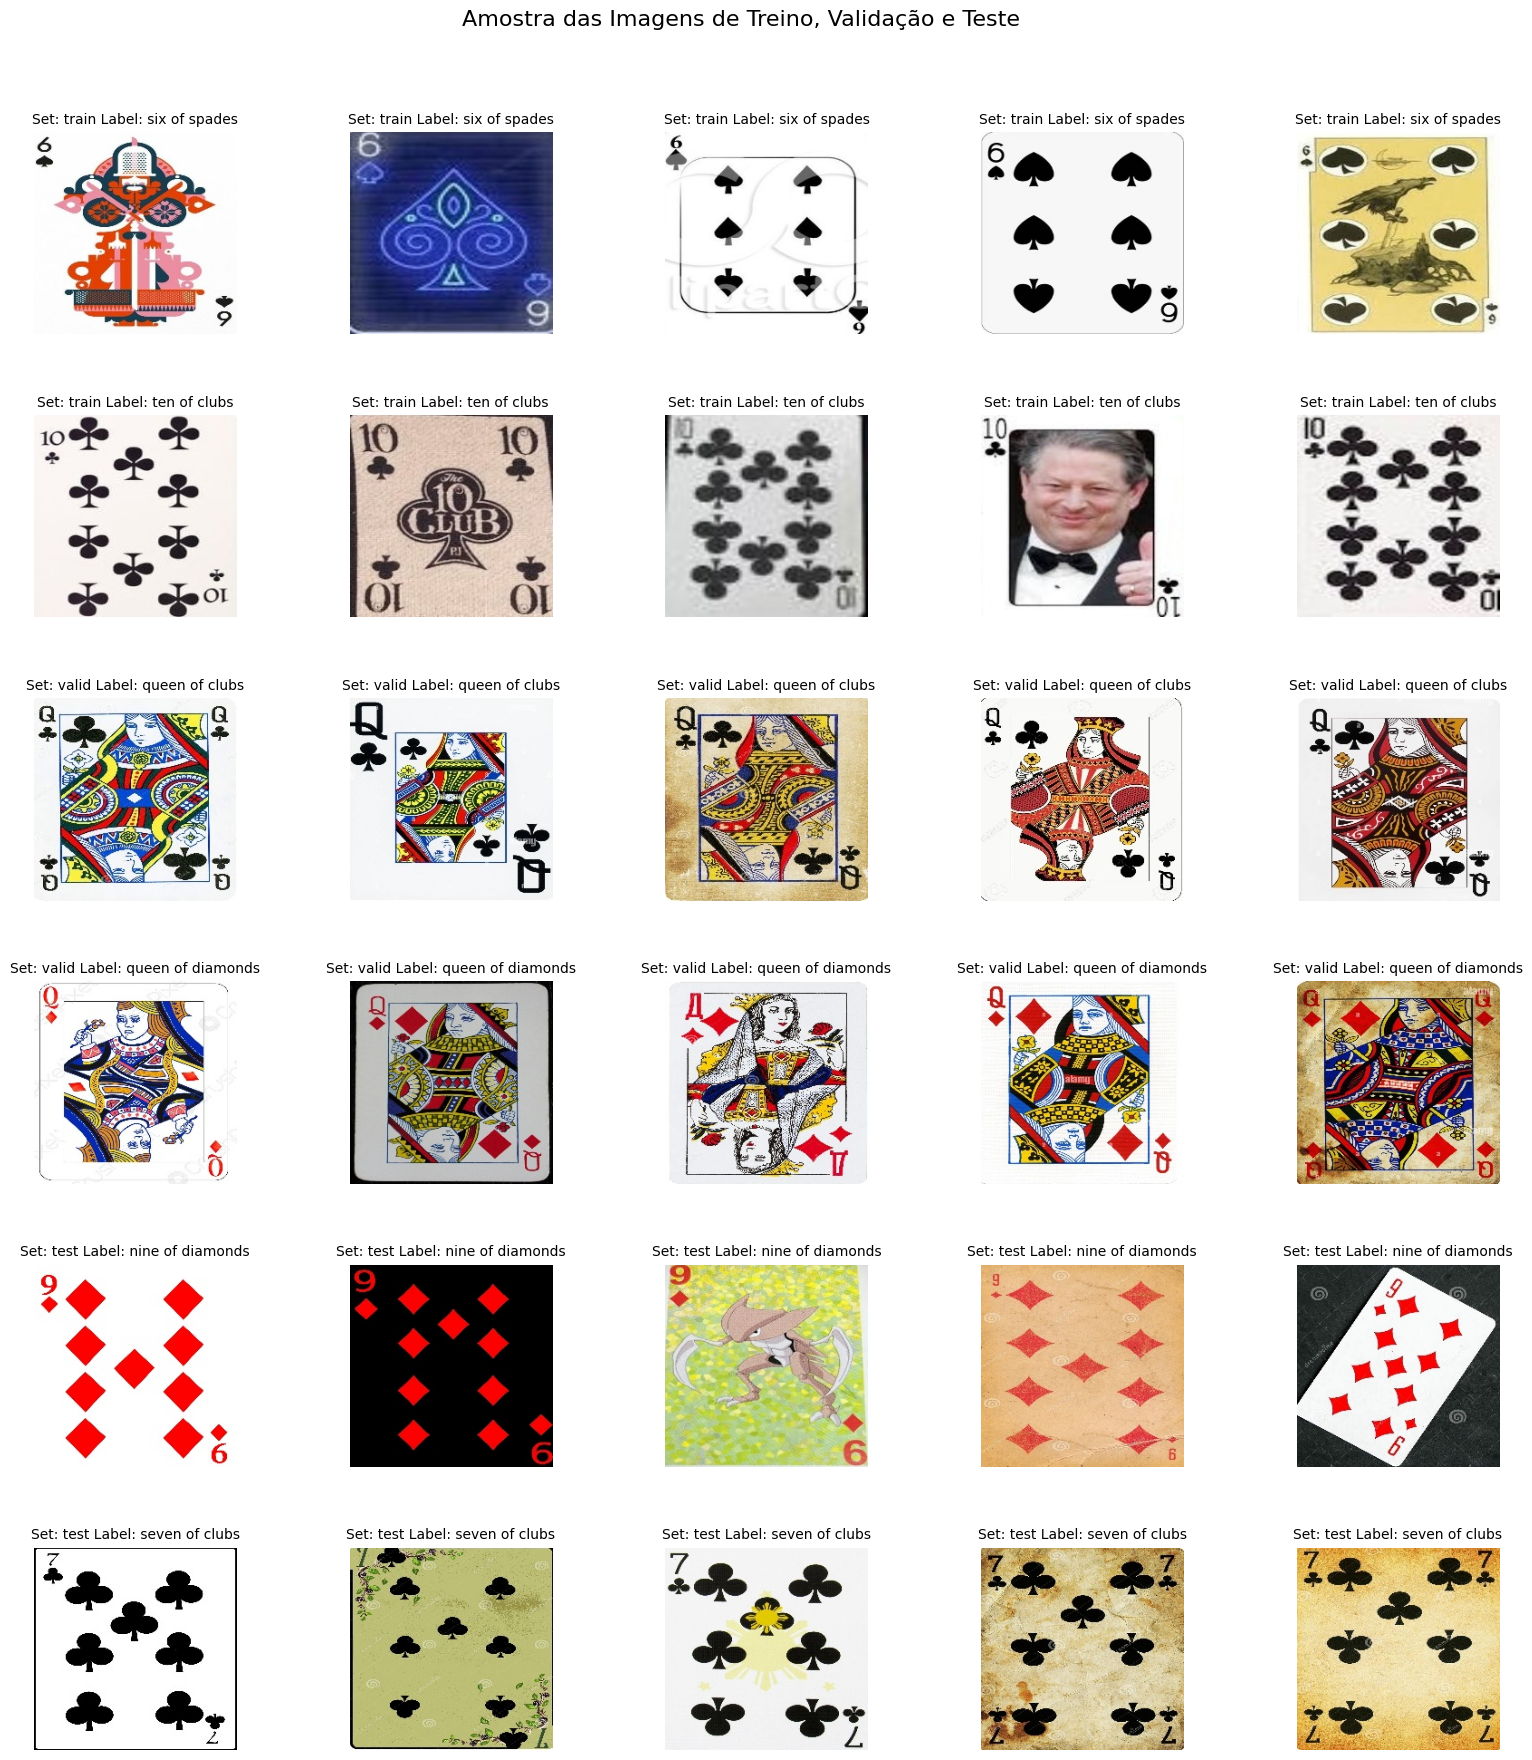

In [18]:
from random import randint
dataset_basepath = './cards-image-dataset/'

fig, ax = plt.subplots(6, 5, figsize=(20,20))
ax = ax.ravel()

plt.subplots_adjust(wspace=0.1, hspace=0.4, top=0.919)

contfigs = 0

for i, _set in enumerate(['train', 'valid', 'test']):
  set_path = dataset_basepath + _set
  dirnames = os.listdir(set_path)

  for cont in range(0, 2):
    cardtype = dirnames[randint(0, len(dirnames) -1)]
    cardtype_path = set_path + '/' + cardtype
    cardtype_images = os.listdir(cardtype_path)

    for c in range(0, 5):
      idx = randint(0, len(cardtype_images) -1) if _set == "train" else c

      ax[contfigs].imshow(plt.imread(cardtype_path + '/' + cardtype_images[idx]))
      ax[contfigs].set_title(f'Set: {_set} Label: {cardtype}', fontsize=10)

      ax[contfigs].axis('off')
      contfigs += 1

plt.suptitle('Amostra das Imagens de Treino, Validação e Teste', fontsize=16)

plt.show()
